# __Learning X2K: Genetic Algorithm Results__

## __Import data__

In [11]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}\

import os
#root = '/Users/maayanlab/Dropbox/Maayan_Lab/X2K_mobile_pipeline/X2K_Genetic_Algorithm'
root = os.getcwd()
import numpy as np
import matplotlib.pyplot as plt
# Import my functions
import Python_scripts.Extra_X2K_functions as Ex

# Data   
GA_output_name = 'GA_results.100pop.10gen.GEO.run3.npy'
results_file = root+'/GA_Results/GEO/'+GA_output_name
GA_Results = np.load(results_file)
# Extract subsets
## Subset 1
GAresults_Subset1 = GA_Results[0]
allPopulations = GAresults_Subset1[0]# Get all populations
allFitnesses = GAresults_Subset1[1] # Get all fitnesses
averageFitness = GAresults_Subset1[2] # Get averageFitne´ss per generation
peakFitness = GAresults_Subset1[3] # Get the peakFitness per generation
GAsettings = GAresults_Subset1[4]
average_PPI_sizes = GAresults_Subset1[5]
## Subset 2
allFitnesses_Subset2 = GA_Results[1]
averageFitness_Subset2 = GA_Results[2]
peakFitness_Subset2 = GA_Results[3]


chance = 4.22

## __GA Settings__

In [12]:
GAsettings

{'breedingVariation': 0,
 'childrenPerGeneration': 90,
 'crossoverPoints': 3,
 'includeFittestParents': 10,
 'initialPopSize': 100,
 'mutationRate': 0.01,
 'numberOfGenerations': 10,
 'parameterLength': 35,
 'topNum': 10}

## Report Peak Fitnesses

In [13]:
print('Peak fitness for X2K GA, Subset1 = '+str(round(peakFitness[-1],2))+'%')
print('Peak fitness for X2K GA, Subset2 = '+str(round(peakFitness_Subset2[-1],2))+'%\n')
print("===============================\n")
print('OPTIMIZED PARAMETERS:')
print(str(Ex.tell_parameters(Ex.getFittestIndividual(GAresults_Subset1))))


avg = sum(average_PPI_sizes[-1]) / len(average_PPI_sizes[-1])
print()
print("===============================\n")
print("Average PPI size in final Subset1 population = "+str(avg))

Peak fitness for X2K GA, Subset1 = 28.46%
Peak fitness for X2K GA, Subset2 = 18.6%


OPTIMIZED PARAMETERS:

___TF (CHEA) Parameters___
run;rank;mouse;transfac;humanarchs4;20

___PPI (G2N) Parameters___
run;BIOCARTA,INNATEDB,KEGG,MINT,MIPS,PDZBASE,PPID;2

___KINASE (KEA) Parameters___
run;pvalue;humanarchs4;P;20

('run;rank;mouse;transfac;humanarchs4;20', 'run;BIOCARTA,INNATEDB,KEGG,MINT,MIPS,PDZBASE,PPID;2', 'run;pvalue;humanarchs4;P;20')


Average PPI size in final Subset1 population = 2353.1017692307646


## __Overfitting Tests__

### Average fitness 

/Users/schilder/Library/Python/3.6/lib/python/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                      sum_sq      df           F         PR(>F)
Trained_v_Test  17332.565681     1.0  692.101635  3.174910e-131
Residual        50036.677363  1998.0         NaN            NaN
************************************************************************
Training and Test runs DO significantly differ


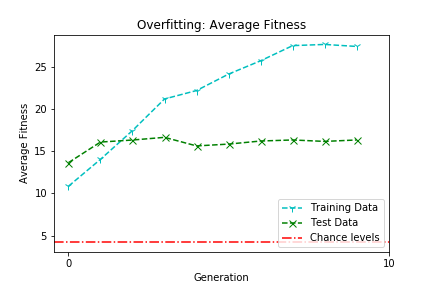

In [14]:
y_s1 = GAresults_Subset1[2] # average fitness for each generation in TRAINED data
y_s2 = averageFitness_Subset2
x = range(len(y_s1))
plt.plot(x, y_s1, 'c1--', markersize=7, label="Training Data")
plt.plot(x, y_s2, 'gx--', markersize=7, label="Test Data")
plt.title('Overfitting: Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.axhline(y=chance, linestyle="-.", color='r', label="Chance levels")
plt.legend(loc='lower right')
plt.xticks(np.arange(min(x), max(x)+2, 10.0))
plt.gcf().set_facecolor('white')


# TEST OVERFITTING
import pandas as pd
## Unlist Subset1 Fitnesses
fit1_df = pd.DataFrame(Ex.parameterDF(GAresults_Subset1)['Fitness'])
fit1_df.columns = ['Average_Fitness']
fit1_df['Trained_v_Test'] = 'Trained'
## Unlist Subset2 Fitnesses
fit2 = []
for sublist in allFitnesses_Subset2:
    for item in sublist:
        fit2.append(item)
fit2_df = pd.DataFrame(fit2, columns=['Average_Fitness'])
fit2_df['Trained_v_Test'] = 'Test'

lm_data = pd.concat([fit1_df, fit2_df])
## Get OLS R2
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Average_Fitness ~ Trained_v_Test',data=lm_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
p = aov_table['PR(>F)'][0]
mod.summary()

print(aov_table)
print("************************************************************************")
if p>0.05:
    print('Training and Test runs do NOT significantly differ.')
else:
    print('Training and Test runs DO significantly differ')

### Peak fitness

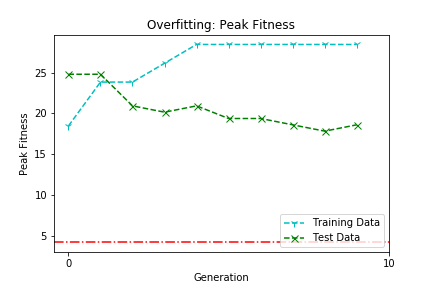

In [15]:
y_s1 = GAresults_Subset1[3] # average fitness for each generation in TRAINED data
y_s2 = peakFitness_Subset2
x = range(len(y_s1))
plt.plot(x, y_s1, 'c1--', markersize=7, label="Training Data")
plt.plot(x, y_s2, 'gx--', markersize=7, label="Test Data")
plt.title('Overfitting: Peak Fitness')
plt.xlabel('Generation')
plt.ylabel('Peak Fitness')
plt.legend(loc='lower right')
plt.xticks(np.arange(min(x), max(x)+2, 10.0))
plt.gcf().set_facecolor('white')
plt.axhline(y=chance, linestyle="-.", color='r', label="Chance levels");

### Plot the distribution of ALL fitnesses in 1st, 2nd & final populations

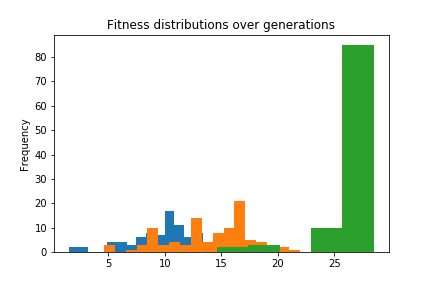

In [16]:
plt.hist( allFitnesses[0], bins=20) # 1st
plt.hist( allFitnesses[1], bins=20) # 2nd
plt.hist( allFitnesses[-1], bins=5) # Last
plt.ylabel('Frequency')
plt.title('Fitness distributions over generations')
plt.gcf().set_facecolor('white');

## __4. X2K Parameters vs. Fitness Analyses__

### Plot Fitness and Parameter Evolution Over Time

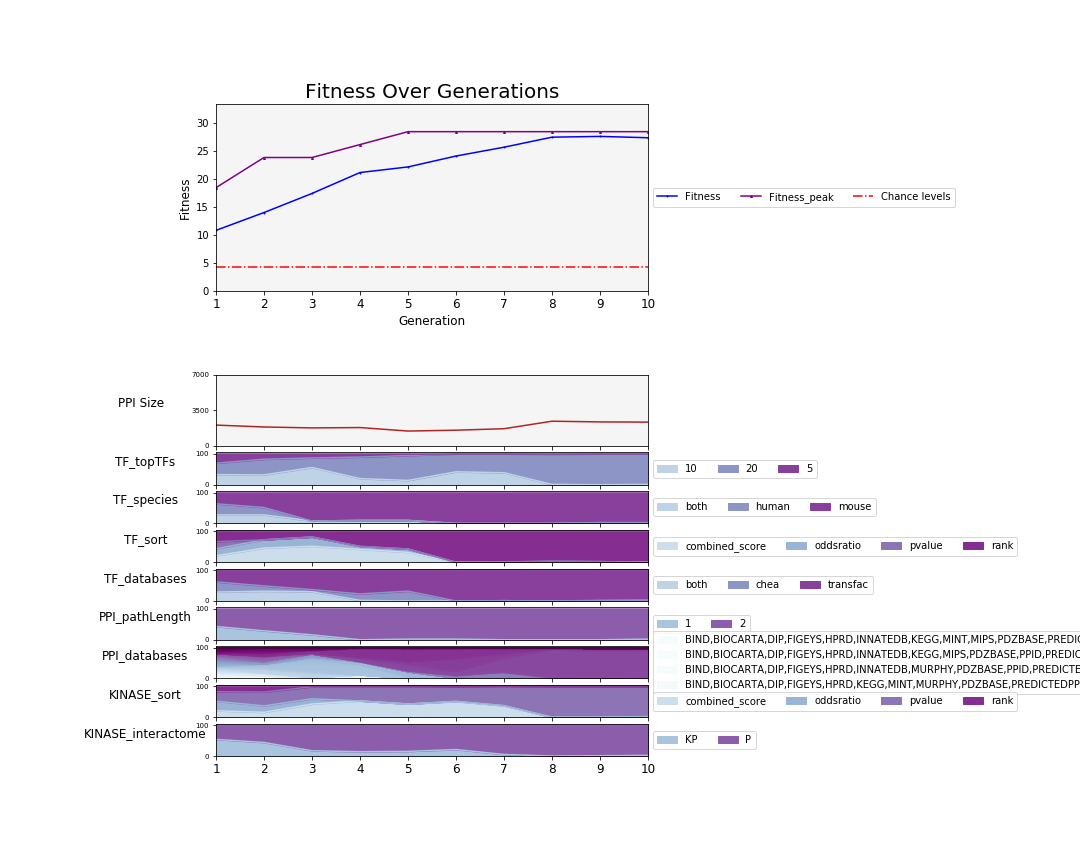

In [23]:
Ex.parameterEvolutionPlot(GAresults_Subset1,figsize=(15,12));

### One-way ANOVAs: Each parameter vs. Fitness

In [18]:
Ex.parameterStats(GAresults_Subset1)

                       df        sum_sq       mean_sq           F  \
KINASE_interactome    1.0   8755.722792   8755.722792  253.412802   
Residual            998.0  34482.122770     34.551225         NaN   
KINASE_sort           3.0  14493.715798   4831.238599  167.405091   
Residual            996.0  28744.129764     28.859568         NaN   
PPI_databases       247.0  36558.477830    148.010032   16.663784   
Residual            752.0   6679.367732      8.882138         NaN   
PPI_pathLength        1.0  10703.420385  10703.420385  328.329561   
Residual            998.0  32534.425177     32.599624         NaN   
TF_databases          2.0  11893.738118   5946.869059  189.159269   
Residual            997.0  31344.107444     31.438423         NaN   
TF_sort               3.0  15807.382402   5269.127467  191.321996   
Residual            996.0  27430.463160     27.540626         NaN   
TF_species            2.0  10929.489168   5464.744584  168.635949   
Residual            997.0  32308.3

/Users/schilder/Library/Python/3.6/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/schilder/Library/Python/3.6/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/schilder/Library/Python/3.6/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F),Sig
KINASE_interactome,1.0,8755.722792,8755.722792,253.412802,5.135729e-51,****
Residual,998.0,34482.122770,34.551225,NaN,NaN,****
KINASE_sort,3.0,14493.715798,4831.238599,167.405091,7.279542e-88,****
Residual,996.0,28744.129764,28.859568,NaN,NaN,****
PPI_databases,247.0,36558.477830,148.010032,16.663784,2.827579e-195,****
Residual,752.0,6679.367732,8.882138,NaN,NaN,****
PPI_pathLength,1.0,10703.420385,10703.420385,328.329561,1.167329e-63,****
Residual,998.0,32534.425177,32.599624,NaN,NaN,****
TF_databases,2.0,11893.738118,5946.869059,189.159269,2.267216e-70,****
Residual,997.0,31344.107444,31.438423,NaN,NaN,****
